In [3]:
import pandas as pd
df = pd.read_csv("Documents/listening_history.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106133 entries, 0 to 106132
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            106133 non-null  int64 
 1   timestamp     106133 non-null  object
 2   platform      106133 non-null  object
 3   duration_ms   106133 non-null  int64 
 4   track_name    106060 non-null  object
 5   artist        106060 non-null  object
 6   album         106017 non-null  object
 7   track_uri     106060 non-null  object
 8   reason_start  106131 non-null  object
 9   reason_end    106132 non-null  object
 10  shuffle       106133 non-null  int64 
 11  skipped       106133 non-null  int64 
 12  source_file   106133 non-null  object
dtypes: int64(4), object(9)
memory usage: 10.5+ MB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year

In [7]:
album_year = (df.groupby(['year', 'album'])['duration_ms'].sum().reset_index())

In [8]:
top_album_per_year = (
    album_year
    .sort_values(['year', 'duration_ms'], ascending=[True, False])
    .groupby('year')
    .head(1)
)

In [10]:
method_year = (
    df
    .groupby(['year', 'platform'])['duration_ms']
    .sum()
    .reset_index()
)

top_method_per_year = (
    method_year
    .sort_values(['year', 'duration_ms'], ascending=[True, False])
    .groupby('year')
    .head(1)
)

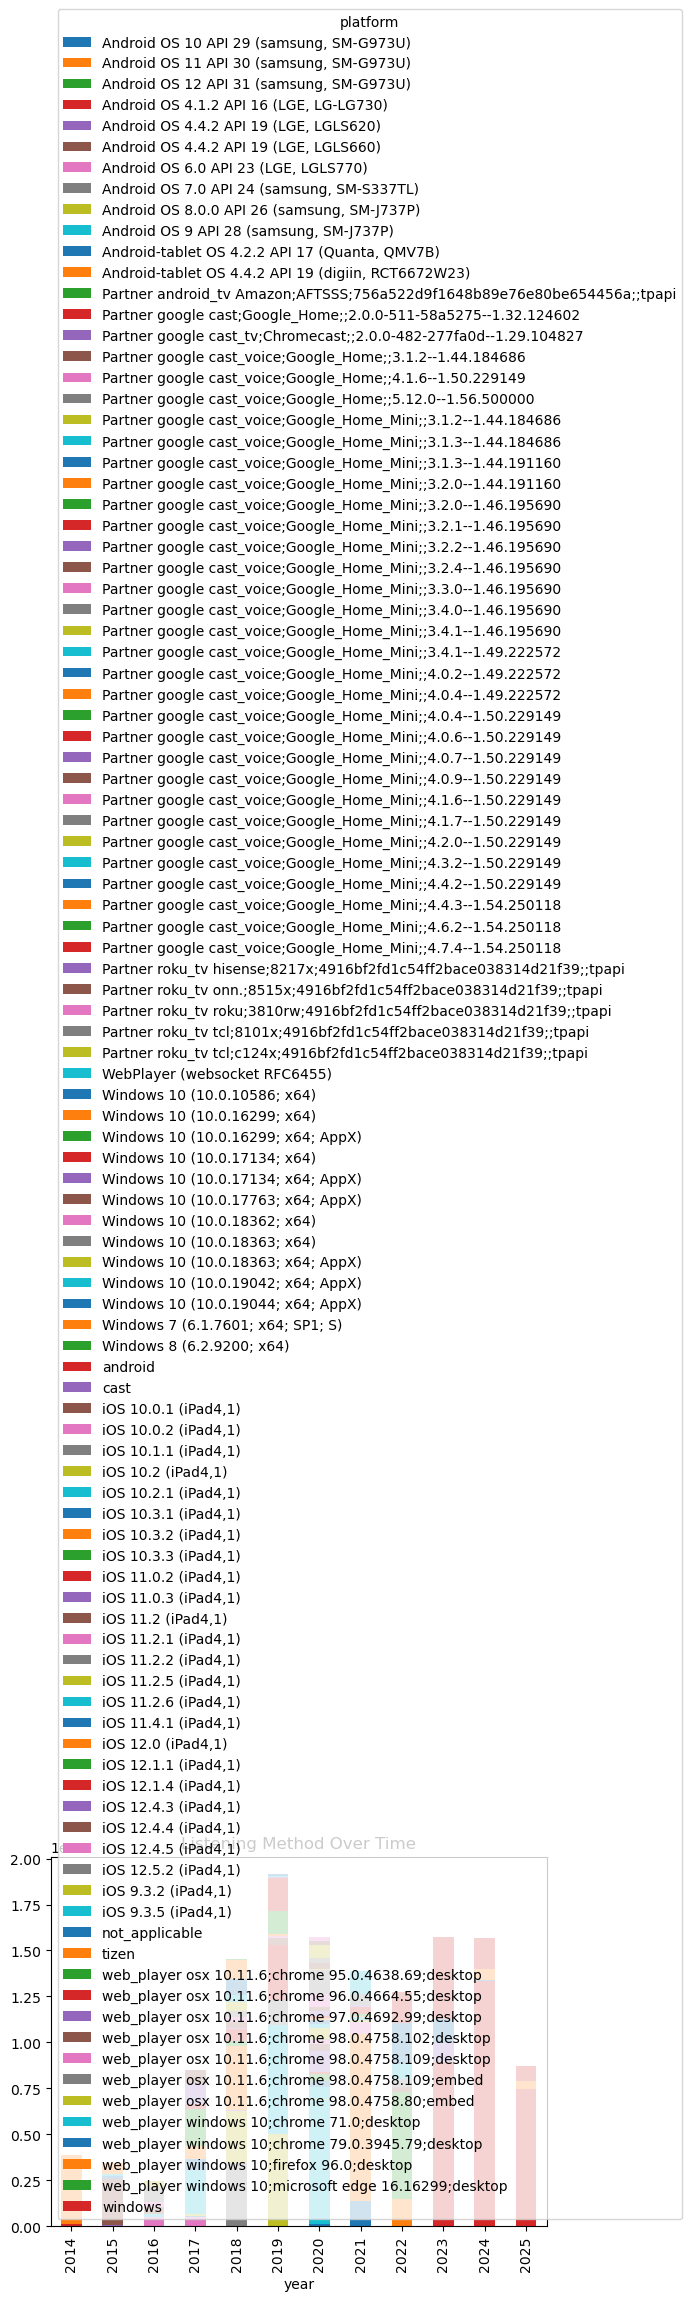

In [13]:
import matplotlib.pyplot as plt
method_year.pivot(
    index='year',
    columns='platform',
    values='duration_ms'
).plot(kind='bar', stacked=True)

plt.title("Listening Method Over Time")
plt.show()

In [14]:
print (top_album_per_year)

       year                   album  duration_ms
84     2014               Evergreen     16453800
428    2015                Cry Baby     34090718
926    2016         The Golden Echo     22500043
1192   2017                     Fin     37537606
2690   2018               The Click     36758453
3994   2019            Primal Heart     35666165
5821   2020       Nonadaptation 비적응     29788233
7860   2021       Petit Petit Petit     22328319
8792   2022              CAPRISONGS     27853095
10930  2023  Girl's Reform Manifest     51474181
14185  2024         sleep paralysis     30690284
14995  2025           Rave Immortal     16610436
